# LetsGrowMore Data Science Internship
## Task-1 Iris Flowers Classification ML Project
### Author- Bhushan L. Shardul

### Importing all necessary libraries:

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [5]:
### Importing Dataset (Iris Dataset)
data=pd.read_csv('Iris.csv')
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [7]:
dummies=pd.get_dummies(data.iloc[:,-1])
dummies

,Setosa,Versicolor,Virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [9]:
merge=pd.concat([data,dummies],axis='columns')
merge

,sepal.length,sepal.width,petal.length,petal.width,variety,Setosa,Versicolor,Virginica
0,5.1,3.5,1.4,0.2,Setosa,1,0,0
1,4.9,3.0,1.4,0.2,Setosa,1,0,0
2,4.7,3.2,1.3,0.2,Setosa,1,0,0
3,4.6,3.1,1.5,0.2,Setosa,1,0,0
4,5.0,3.6,1.4,0.2,Setosa,1,0,0
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica,0,0,1
146,6.3,2.5,5.0,1.9,Virginica,0,0,1
147,6.5,3.0,5.2,2.0,Virginica,0,0,1
148,6.2,3.4,5.4,2.3,Virginica,0,0,1


In [10]:
final=merge.drop(['variety'],axis='columns')
final.head()

,sepal.length,sepal.width,petal.length,petal.width,Setosa,Versicolor,Virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [11]:
final=final.drop(['Setosa'],axis='columns')
final.head()

,sepal.length,sepal.width,petal.length,petal.width,Versicolor,Virginica
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [13]:
label=LabelEncoder()
new_data=data
new_data.variety=label.fit_transform(new_data.variety)
new_data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [17]:
x=data.iloc[:,:4]
y=data.iloc[:,-1]
print(x.shape)
print(y.shape)

(150, 4)
(150,)


In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=5)

In [22]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=2)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(y_pred)

[1 2 2 0 2 1 0 2 0 1 1 2 2 2 0 0 2 2 0 0 1 2 0 1 1 2 1 1 1 2 0 1 1 0 1 0 0
 2]


In [23]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[12,  0,  0],
       [ 0, 13,  1],
       [ 0,  0, 12]], dtype=int64)

In [26]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)
acc

0.9736842105263158

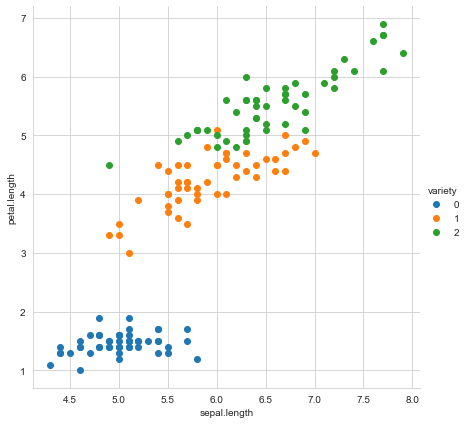

In [29]:
sns.set_style('whitegrid')
sns.FacetGrid(data,hue='variety',height=6).map(plt.scatter, 'sepal.length','petal.length').add_legend()